In [1]:
# Importando Pandas e Numpy
import pandas as pd
import numpy as np

In [2]:
# Importando Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# Ler arquivo csv
df = pd.read_csv('911.csv')

In [86]:
# Verificando a info do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# Verificando o cabeçalho do df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
# Quais são os top 5 CEPs nas chamadas 911?
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [14]:
# Quais são os 5 principais municípios nas chamadas 911?
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [18]:
# Dê uma olhada na coluna 'title'. QUantos códigos de título exclusivos existem?
df['title'].nunique()
#len(df['title'].unique())

110

In [87]:
'''
Criando novos recursos
Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS",
"Fire" e "Traffic". Use .apply() com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão"
que contém esse valor de string.
Por exemplo, se o valor da coluna título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seris EMS
'''
df['Reason'] = df["title"].apply(lambda x: x.split(':')[0])
#df['title'].iloc[0].split(':')[0]

In [88]:
df['Reason'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [25]:
# Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

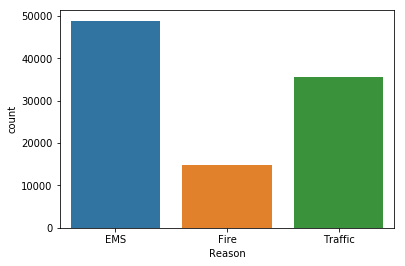

In [89]:
# Usando o Seaborn para criar um contplot de chamadas 911 baseadas nessa nova coluna
sns.countplot(x='Reason',data=df)


In [90]:
# Vendo informações sobre tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?
type(df['timeStamp'].iloc[1])

str

In [91]:
# Convertendo a coluna de strings em objetos DateTime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [92]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [93]:
time = df['timeStamp'].iloc[3]

In [94]:
time.day

10

In [95]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [96]:
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [97]:
df['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

In [98]:
dmap={0:'Mon',1:'Tue',2:'Web',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [99]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [100]:
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

In [79]:
#dmap_month={1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'Jul',8:'Ago',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [80]:
#df['Month']=df['Month'].map(dmap_month)

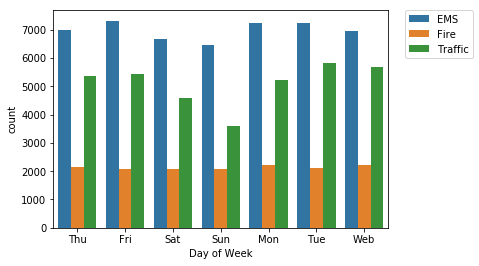

In [101]:
sns.countplot(x='Day of Week',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

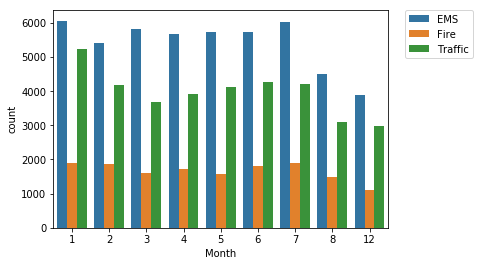

In [102]:
sns.countplot(x='Month',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [104]:
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


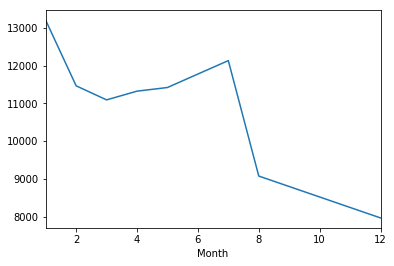

In [105]:
# Contagem de chamadas no mês
byMonth['twp'].plot()

In [107]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [108]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


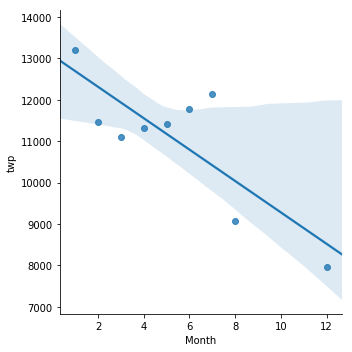

In [109]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [116]:
# Criando nova coluna com a data da coluna timeStamp
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [117]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

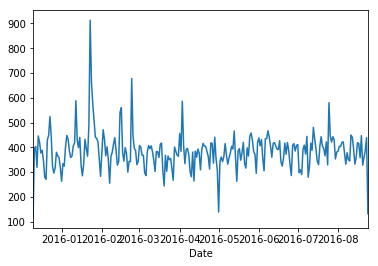

In [119]:
# Agrupando a coluna Data com groupby e criando gráfico de contagens de chamadas 911
df.groupby('Date').count()['twp'].plot()

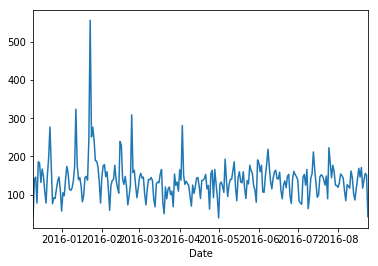

In [120]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

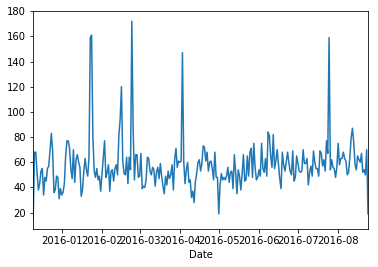

In [121]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

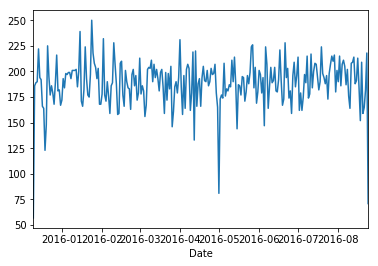

In [122]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [127]:
# Criando mapas de calor
dayHour=df.groupby(by=['Day of Week','Hour']).count()['twp'].unstack()

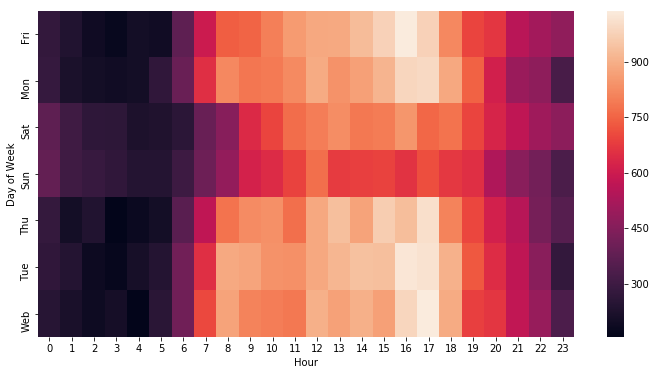

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

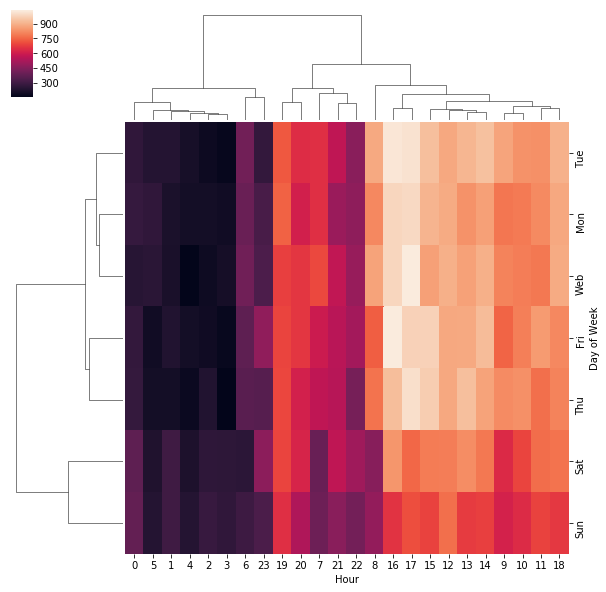

In [131]:
# Criando um cluster map
sns.clustermap(dayHour)

In [132]:
dayHour=df.groupby(by=['Day of Week','Month']).count()['twp'].unstack()

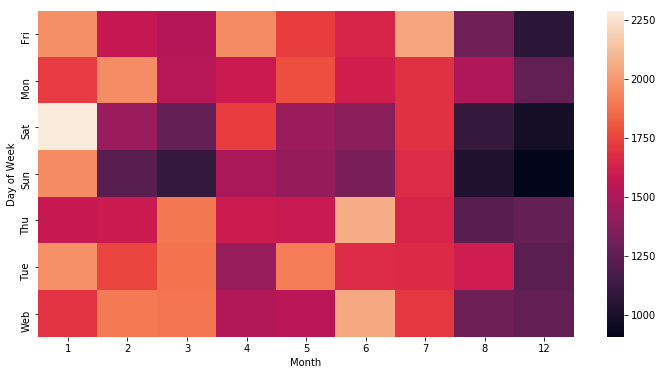

In [133]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

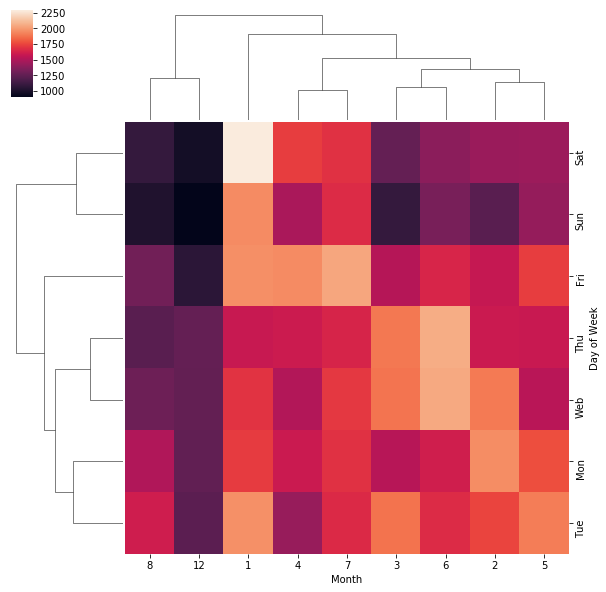

In [134]:
sns.clustermap(dayHour)